In [1]:
import os
import time
global notebook
notebook = 1

dir = '/global/u1/j/jackh/bh/harm2d'
os.chdir(dir)

%run -i setup.py build_ext --inplace
%run -i pp.py build_ext --inplace
%matplotlib inline
import matplotlib
print('Imports done.')

Imports done.


In [2]:
global notebook, axisym,set_cart,axisym,REF_1,REF_2,REF_3,set_cart,D,print_fieldlines
global lowres1,lowres2,lowres3, RAD_M1, RESISTIVE, export_raytracing_GRTRANS, export_raytracing_RAZIEH,r1,r2,r3
global r_min, r_max, theta_min, theta_max, phi_min,phi_max, do_griddata, do_box, check_files, kerr_schild

dir = '/pscratch/sd/l/lalakos/ml_data_rc300/reduced'
os.chdir(dir)

# set params
lowres1 = 1
lowres2 = 1
lowres3 = 1

do_box=0
r_min=1.0
r_max=100.0
theta_min=0.0
theta_max=9
phi_min=-1
phi_max=9
axisym=1
print_fieldlines=0
export_raytracing_GRTRANS=0
export_raytracing_RAZIEH=0
kerr_schild=0
DISK_THICKNESS=0.03
set_cart=0
set_mpi(0)
check_files=1
notebook=1

interpolate_var=0

AMR = 0 # get all data in grid

D = 2000 # name of the dump

start = time.time()

rblock_new(D)
print(f'Time to rblock: {time.time()-start:.3f} s')
start = time.time()
rpar_new(D)

print(f'Time to rpar: {time.time()-start:.3f} s')
start = time.time()

if AMR:
    rgdump_new(dir)
    rdump_new(dir,D)
else:
    rgdump_griddata(dir)
    print(f'Time to rgdump: {time.time()-start:.3f} s')
    start = time.time()
    rdump_griddata(dir,D)
    print(f'Time to rdump: {time.time()-start:.3f} s')
    start = time.time()

print(f'Time to read: {time.time()-start:.3f} s')
    
# print("r-shape=",r.shape)
# rhor = 1+np.sqrt(1-a**2)
# print(r[0,0,0,0]/rhor)
# print('what is the time?', t)

Time to rblock: 5.147 s
Time to rpar: 0.067 s
Time to rgdump: 1.934 s
Time to rdump: 0.903 s
Time to read: 0.000 s


In [3]:
import torch
from tqdm import tqdm

# read in data, pickle final tensor. NOTE this will not work for training

data = []
dumps_path = '/pscratch/sd/l/lalakos/ml_data_rc300/reduced'
# dumps = 10000
dumps = 5
prog_bar = tqdm(range(dumps), total=dumps)
for dump in prog_bar:
    #     
    rblock_new(dump)
    rpar_new(dump)
    rgdump_griddata(dumps_path)
    rdump_griddata(dumps_path,dump)

    rho_tensor = torch.tensor(rho)[0].unsqueeze(0)
    ug_tensor = torch.tensor(ug)[0].unsqueeze(0)
    uu_tensor = torch.tensor(uu[1:4]).squeeze(1)
    B_tensor = torch.tensor(B[1:4]).squeeze(1)
    data_tensor = torch.cat((rho_tensor, ug_tensor, uu_tensor, B_tensor), dim=0)

    data.append(data_tensor.unsqueeze(0))

    prog_bar.set_description(f'Dump {dump} processed.')

data = torch.cat(data, dim=0)

save_path = os.environ['HOME']+'/bh/data.pkl'
torch.save(data, save_path)
print(f'Tensorized and saved {dumps} dumps at: {save_path})')




Dump 4 processed.: 100%|██████████| 5/5 [00:38<00:00,  7.75s/it]


Tensorized and saved 5 dumps at: /global/homes/j/jackh/bh/data.pkl)


In [6]:
# load in saved tensor
save_path = os.environ['HOME']+'/bh/data.pkl'
data = torch.load(f=save_path)
print(data.shape)

torch.Size([5, 8, 224, 48, 96])


NameError: name 'do_save' is not defined

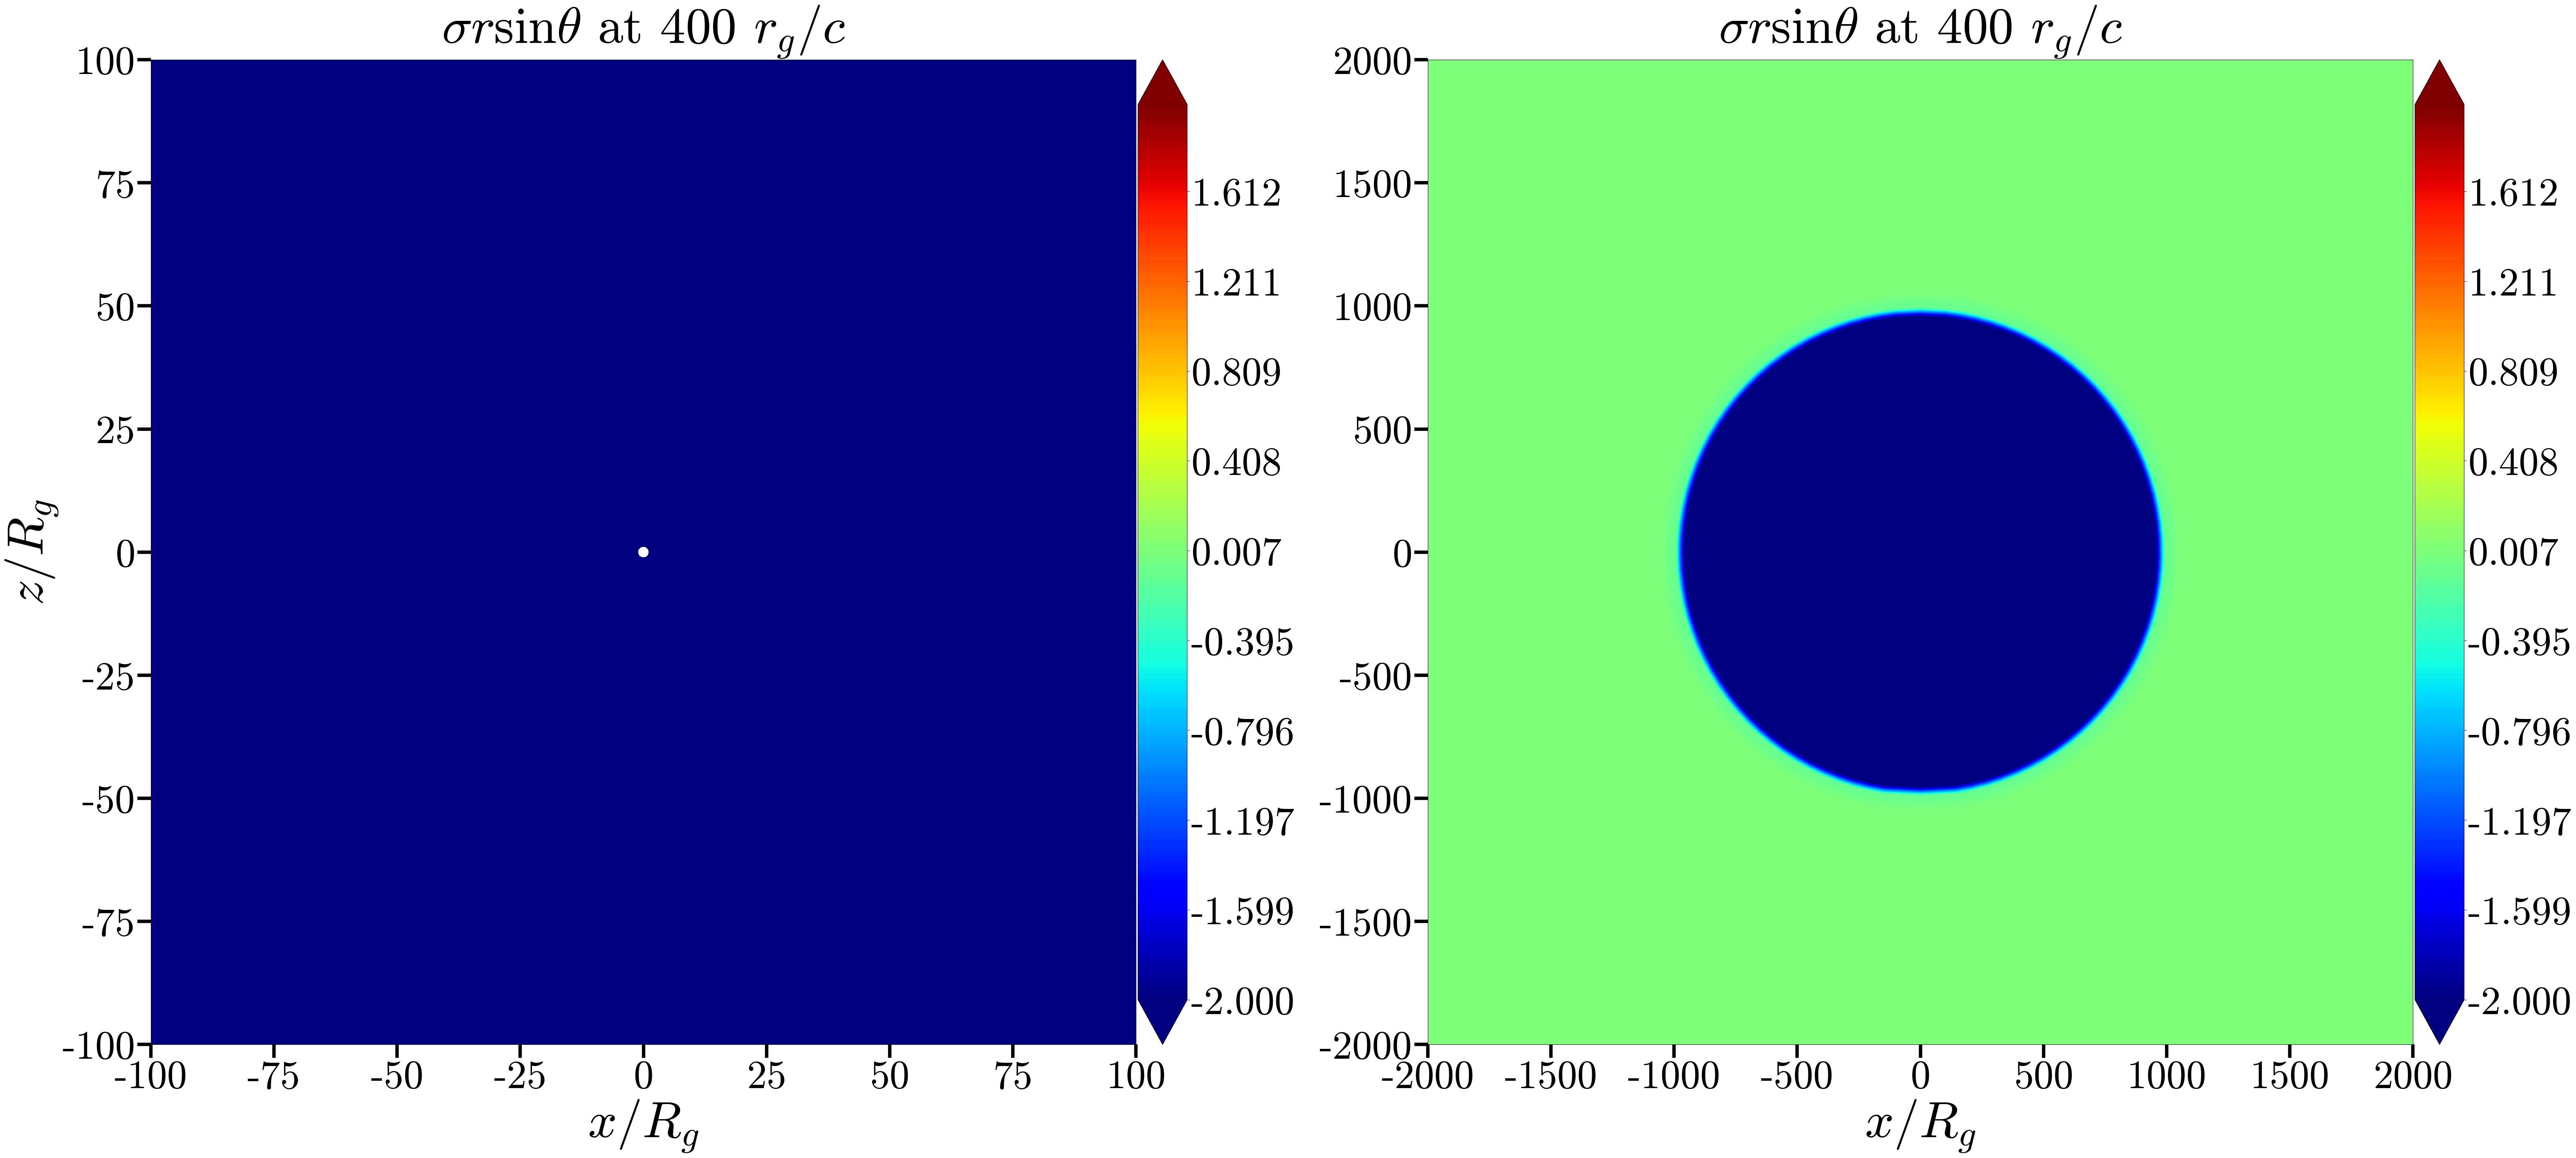

In [5]:

do_save = 0
plc_cart((rho), -2,2, 100, 0, dir+'rho%d' %D, r"$\sigma r {\rm sin}\theta$ at %d $r_g/c$" % t)
